In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [17]:
class LogisticRegression:

    def __init__(self, learning_rate = 0.001, epochs = 40):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y, X_val = None, y_val = None):

        n_samples, n_feature = X.shape
        self.weights = np.random.randn(n_feature)
        self.bias = 0
        loss_history = []
        val_loss_history = [0]
        early_stopping = 0


        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
    

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = self._cost(y_predicted, y, n_samples)
            loss_history.append(cost)

            val_cost = self._cost(self._predict(X_val),y_val,X_val.shape[0])
            val_loss_history.append(val_cost)

            print("Epoch " + str(_) + " : Accuracy = " + str(self.accuracy(y, y_predicted)) + ", Loss = " + str(cost) + "Val_loss = " + str(val_cost) )


            if np.abs(val_loss_history[-1] - val_loss_history[-2]) <= np.abs(val_loss_history[-1] * 0.20):
              early_stopping += 1
            else:
              early_stopping = 0

            if early_stopping == 3:
              break


        return loss_history, val_loss_history

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_classified = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_classified

    def _predict(self, X):
      linear_model = np.dot(X, self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)
      return y_predicted

    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    def _cost(self, y_pred, y, n_samples):
      epsilon = 1e-5
      error = (y * np.log(y_pred + epsilon)) + ((1 - y) * np.log(1 - y_pred + epsilon))
      cost = (-1 / n_samples) * sum(error)
      return cost


    def _sigmoid(self, X):
        return 1 / (1 + np.exp(-X))


In [18]:
data = np.load("/content/drive/MyDrive/Colab Notebooks/data.npy")

np.random.shuffle(data)

slicer = int(data.shape[0]*0.9)
X_train = data[:slicer,:-1]
X_test = data[slicer:data.shape[0],:-1]
y_train = data[:slicer,-1]
y_test = data[slicer:data.shape[0],-1]

In [19]:
model = LogisticRegression(learning_rate= 0.001, epochs= 300)
history, val_history = model.fit(X_train, y_train , X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in exp


Epoch 0 : Accuracy = 0.5367647058823529, Loss = 4.9063986978705705Val_loss = 4.56171914608646
Epoch 1 : Accuracy = 0.5252100840336135, Loss = 4.9341824004963835Val_loss = 5.647275376749597
Epoch 2 : Accuracy = 0.5535714285714286, Loss = 4.80107758363536Val_loss = 4.77894434397915
Epoch 3 : Accuracy = 0.4989495798319328, Loss = 5.744364312904069Val_loss = 6.7339711210410735
Epoch 4 : Accuracy = 0.5, Loss = 5.756457732510071Val_loss = 4.6080329278570025
Epoch 5 : Accuracy = 0.4989495798319328, Loss = 5.683897214874029Val_loss = 6.7339711210410735
Epoch 6 : Accuracy = 0.5, Loss = 5.756457732510071Val_loss = 4.127268751621894
Epoch 7 : Accuracy = 0.5546218487394958, Loss = 4.916713794637452Val_loss = 6.516745923589751
Epoch 8 : Accuracy = 0.5189075630252101, Loss = 5.4541222423600395Val_loss = 4.453106547802163
Epoch 9 : Accuracy = 0.5063025210084033, Loss = 5.598916508105434Val_loss = 6.7339711210410735
Epoch 10 : Accuracy = 0.5063025210084033, Loss = 5.611336749168102Val_loss = 3.8014309

In [20]:
predictions = model.predict(X_test)

accuracy = model.accuracy(y_test, predictions)

print(accuracy)

0.8679245283018868


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in exp


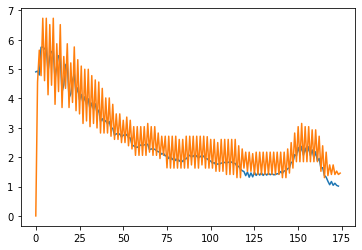

In [21]:
plt.plot(history)
plt.plot(val_history)
